In [1]:
import nltk  # natural language processing library
import scipy.stats as ss  # statistical functions required to assign ranks
import matplotlib.pyplot as plt # to plot graphs
import math # for taking lagarithm in Zipf's eaquation
import numpy as np
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/akshay./nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [3]:
from nltk.corpus import gutenberg
gutenberg.fileids() # To display file IDs in gutenberg

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
classic = gutenberg.words('austen-sense.txt')
classic

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...]

In [5]:
classic_words = [w.lower() for w in classic]

In [ ]:
# basic statistics related to the word occurence in the file
import pandas as pd
s = pd.Series(classic_words);
s.describe()
# count	-> Total number of entries
# unique	-> Total number of unique entries
# top	-> Most frequent entry
# freq	-> Frequency of the most frequent entry

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshay./nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
# removing stopwords 
from nltk.corpus import stopwords
new_list = []
for word in classic_words:
    if word not in stopwords.words('english'):
      new_list.append(word)
print(len(new_list))
len(classic_words)

74829


141576

In [64]:
classic_words = new_list

In [65]:
# stemming
size = len(classic_words)
for i in range(size):
  classic_words[i] = porter.stem(classic_words[i])

In [66]:

unique_words = set(classic_words)
word_counts = [(w,classic_words.count(w)) for w in unique_words] # list of tuples having words and
                                                                 # their counts

In [68]:
word_counts[100:105] # displaying some tuples of the word_counts list

[(';"--', 1), ('formerli', 5), ('anxiou', 29), ('crimin', 1), ('slightest', 3)]

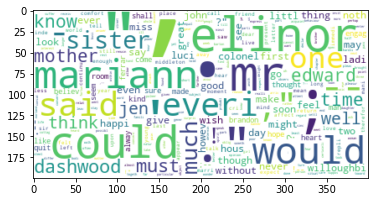

In [73]:
# word cloud
from wordcloud import WordCloud
fdict ={}
for w,c in word_counts:
  fdict[w] = c
cloud = WordCloud(background_color="white", max_words=1000)
cloud.generate_from_frequencies(fdict)
plt.imshow(cloud, interpolation="bilinear")

In [74]:
# Separating words and their counts from the tuples in the word_counts list
unique_words_list = [w for (w,c) in word_counts]
counts = [c for (w,c) in word_counts]

In [75]:
ranks = ss.rankdata([c for (w,c) in word_counts])
# rankdata function assigns highest rank to highest value/frequency.
# in case of same frequencies of different words rankdata uses average method by default
# The average of the ranks that would have been assigned to all the tied values is assigned to each value.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html  (reference)
ranks

array([2032. , 3309. ,  661.5, ..., 3456. , 1594.5,  661.5])

In [76]:
# combining word, its count and its rank in a tuple
wrd_cnt_rnk = list(zip(unique_words_list,counts,ranks))
#caution for applying list method on zip objects: https://tinyurl.com/yc3sets2
wrd_cnt_rnk[500:505]

[('nearli', 8, 2880.0),
 ('hazard', 3, 2032.0),
 ('cant', 1, 661.5),
 ('thorough', 5, 2502.5),
 ('undeserv', 1, 661.5)]

In [77]:
# sorting the list on the basis of rank
wrd_cnt_rnk_sorted = sorted(wrd_cnt_rnk, key=lambda x:x[-1])
# https://tinyurl.com/4bwkx6xd (reference)
print(wrd_cnt_rnk[2000])
wrd_cnt_rnk_sorted[3500]

('unpardon', 5, 2502.5)


('affection', 24, 3506.0)

[('make', 169, 3999.5), ('wish', 171, 4001.0), ('without', 174, 4002.0), ('may', 175, 4003.5), ('ladi', 175, 4003.5), ('colonel', 176, 4005.0), ('even', 178, 4006.0), ('soon', 181, 4007.0), ('good', 185, 4008.0), ('luci', 186, 4009.0), ('noth', 189, 4010.5), ('never', 189, 4010.5), ('day', 195, 4012.0), ('thing', 208, 4013.0), ('say', 212, 4014.0), ('?"', 213, 4015.0), ('see', 214, 4016.0), ('might', 215, 4017.0), ('though', 216, 4018.0), ('miss', 217, 4019.0), ('willoughbi', 219, 4020.0), ('jen', 235, 4021.0), ('think', 236, 4022.0), ('well', 240, 4023.0), ('mother', 261, 4024.0), ('edward', 263, 4025.5), ('time', 263, 4025.5), ('know', 269, 4027.0), ('must', 283, 4028.0), ('dashwood', 288, 4029.0), ('!', 289, 4030.0), ('much', 290, 4031.0), ('sister', 330, 4032.0), ('one', 332, 4033.0), ('-', 366, 4034.0), ('everi', 377, 4035.0), (',"', 396, 4036.0), ('said', 397, 4037.0), ('--', 461, 4038.0), ('would', 515, 4039.0), ('mariann', 566, 4040.0), ('could', 578, 4041.0), ('elinor', 685, 4

(array([46.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 169. , 1091.8, 2014.6, 2937.4, 3860.2, 4783. , 5705.8, 6628.6,
        7551.4, 8474.2, 9397. ]),
 <BarContainer object of 10 artists>)

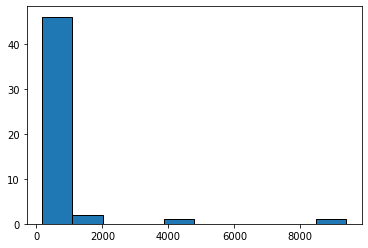

In [78]:
# Plotting a histogram of first fifty most frequently appearing words.
wrds_50 = wrd_cnt_rnk_sorted[-50:]
print(wrds_50)
plt.hist([c for (w,c,r) in wrds_50],edgecolor='black')

### Zipf's law
$f = C*r^{-\alpha} \newline$
$log(f) = logC -\alpha*log(r) $ <br/>
$y = k + mx$ (straight line)

$y = logf$ which is equal to log of word counts in our tuple list
$x = log(r)$ 

In zipfs law, frequency is inversely proportional to rank. So we have to reverse our ranks for zipf's law
Which can be done by: L+1-r, where L is total unique words

In [79]:
L = len(wrd_cnt_rnk_sorted)

Text(0, 0.5, 'log(f)')

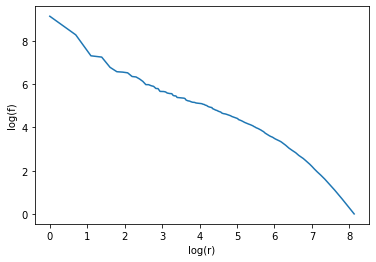

In [80]:
# plotting graph x vs y i.e. log(L+1-r) vs log(c)
plt.plot([math.log(L-r+1) for (w,c,r) in wrd_cnt_rnk_sorted], [math.log(c) for (w,c,r) in wrd_cnt_rnk_sorted])
plt.xlabel('log(r)')
plt.ylabel('log(f)')

We have many points(x,y) but they are not be collinear
We use least square method to find a line (or particular values of m and k) which fits to all these points as close possible.
(Similar to what we do in Linear Regression) <br/>

$\begin{bmatrix}
x_1 & 1\\
x_2 & 1\\
x_3 & 1
\end{bmatrix}*\begin{bmatrix}
m\\
k
\end{bmatrix} = \begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}$ <br/>

$\implies Ax = b \newline A^TAx=A^Tb$

Least square solution:
$\hat{x}=(A^TA)^{-1}A^Tb$

In [81]:
x = np.array([math.log(L-r+1) for (w,c,r) in wrd_cnt_rnk_sorted])
y = np.array([math.log(c) for (w,c,r) in wrd_cnt_rnk_sorted])
print(np.shape(x))
x

(4049,)


array([8.12814262, 8.12814262, 8.12814262, ..., 1.09861229, 0.69314718,
       0.        ])

In [82]:
x = x.reshape(len(x),1)
x

array([[8.12814262],
       [8.12814262],
       [8.12814262],
       ...,
       [1.09861229],
       [0.69314718],
       [0.        ]])

In [83]:
A = np.hstack( ( x, np.ones((len(x),1)) ) )
np.shape(A)

(4049, 2)

In [84]:
b = y.reshape(len(y),1)
np.shape(b)

(4049, 1)

In [85]:
sol = np.dot(A.T,A) # (A^T A)
sol = np.linalg.inv(sol) # (A^T A)^-1
sol = np.dot( np.dot(sol,A.T), b)
np.shape(sol)

(2, 1)

In [86]:
sol

array([[-1.39006301],
       [11.57218872]])

Text(0, 0.5, 'log(freq)')

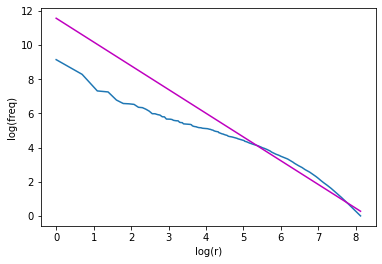

In [87]:
plt.plot(x,y)
plt.plot(x, np.dot(A,sol), 'm')
plt.xlabel('log(r)')
plt.ylabel('log(freq)')